# [Text Splitters](https://chunkviz.up.railway.app/)

Text Splitters in the process of breaking large chunks of text(like,artcies,PDFs.HTML pages, or books) into smaller, manageable pieces(chunks) that an LLM can handle effectively.

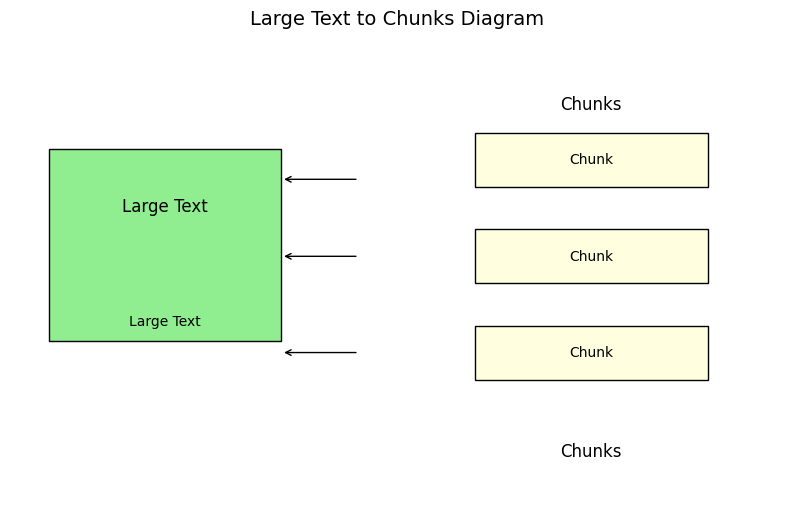

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Draw large text box (left)
large_text_box = Rectangle((0.5, 2), 3, 2.5, linewidth=1, edgecolor='black', facecolor='lightgreen')
ax.add_patch(large_text_box)
ax.text(2, 3.75, 'Large Text', fontsize=12, ha='center', va='center')

# Draw chunks (right)
chunk_positions = [(6, 4), (6, 2.75), (6, 1.5)]
for x, y in chunk_positions:
    rect = Rectangle((x, y), 3, 0.7, linewidth=1, edgecolor='black', facecolor='lightyellow')
    ax.add_patch(rect)
    ax.text(x + 1.5, y + 0.35, 'Chunk', fontsize=10, ha='center', va='center')

# Draw arrows from large text to chunks
for y in [3.75, 2.75, 1.5]:
    ax.annotate('', xy=(3.5, y + 0.35), xytext=(4.5, y + 0.35),
                arrowprops=dict(arrowstyle='->', linewidth=1))

# Add labels
ax.text(2, 2.2, 'Large Text', fontsize=10, ha='center')
ax.text(7.5, 5, 'Chunks', fontsize=12, ha='center')
ax.text(7.5, 0.5, 'Chunks', fontsize=12, ha='center')

# Show plot
plt.title('Large Text to Chunks Diagram', fontsize=14)
plt.show()

- **Overcoming model limitations:** Many embedding models and language models have maximum input size constraints. Splitting allows us to process documents that would otherwise exceed these limits.
  
- **Downstream tasks - Text Splitting improves nearly every LLM powered task**

| **Task**               | **Why Splitting Helps**                                |
|------------------------|--------------------------------------------------------|
| Embedding              | Short chunks yield more accurate vectors             |
| Semantic Search        | Search results point to focused info, not noise     |
| Summarization          | Prevents hallucination and topic drift               |

- **Optimizing computational resources:** Working with smaller chunks of text can be more memory-efficient and allow for better parallelization of processing tasks.

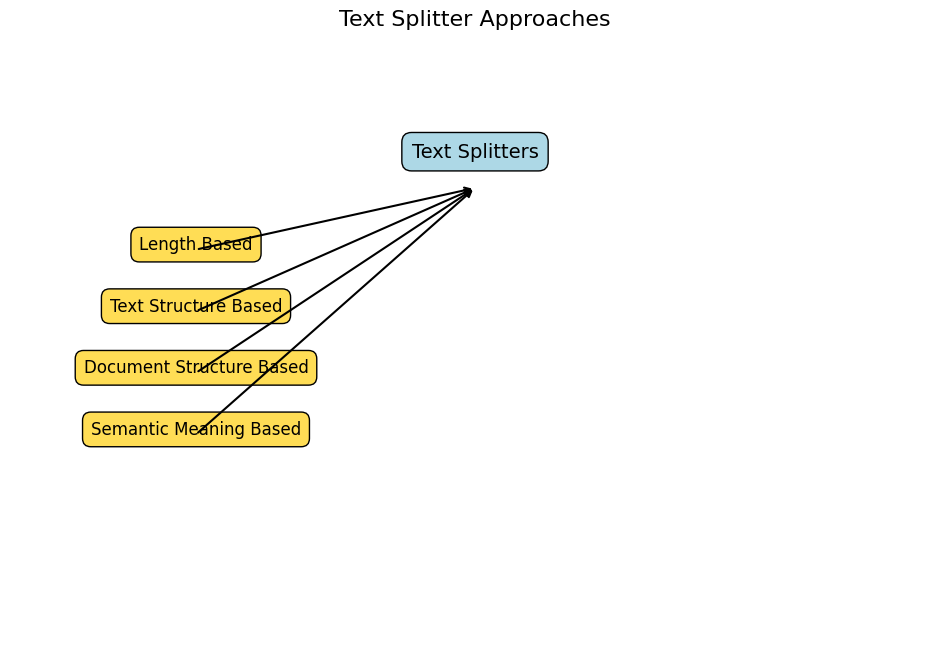

In [2]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Draw the main box for "Text Splitters"
ax.text(0.5, 0.8, 'Text Splitters', fontsize=14, ha='center', bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue'))

# Draw boxes for split methods
methods = ['Length Based', 'Text Structure Based', 'Document Structure Based', 'Semantic Meaning Based']
positions = [0.65, 0.55, 0.45, 0.35]
colors = ['#FFDD55', '#FFDD55', '#FFDD55', '#FFDD55']

for method, y in zip(methods, positions):
    ax.text(0.2, y, method, fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.5", facecolor=colors[methods.index(method)]))

# Draw arrows from main box to each method
for y in positions:
    ax.annotate('', xy=(0.5, 0.75), xytext=(0.2, y),
                arrowprops=dict(arrowstyle='->', linewidth=1.5))

# Show plot
plt.title('Text Splitter Approaches', fontsize=16)
plt.show()

### What are Text Splitters?

**Text Splitters** in LangChain are utilities designed to break up large pieces of text (such as documents, web pages, or PDF pages) into smaller, manageable chunks. These chunks are better suited for embedding, retrieval, and LLM processing, as most models have maximum context window limitations and perform better with focused, shorter pieces of text.


### Why Use Text Splitters?

- **Model Limitations:** LLMs (like GPT-3/4) have maximum context window sizes (e.g., 4096–32,000 tokens).
- **Retrieval Efficiency:** Smaller chunks allow more relevant and targeted retrieval from vector stores.
- **Improved Results:** Focused chunks reduce hallucination and increase answer accuracy.

### Types of Text Splitters

LangChain offers several built-in text splitters, each with different splitting strategies:

#### 1. RecursiveCharacterTextSplitter
- **Most popular and robust.**
- Splits text recursively by different separators (paragraphs, sentences, words) to best fit the desired chunk size.
- Preserves as much natural structure as possible.
- **Recommended for most use cases.**

##### 2. CharacterTextSplitter
- Splits text into chunks based simply on character count, with optional overlap.

#### 3. TokenTextSplitter
- Splits text by model tokens (using a tokenizer), ensuring chunks fit within token limits.
- Useful for models with strict token constraints.

#### 4. MarkdownTextSplitter
- Splits text based on Markdown structure (headings, lists, etc.).
- Useful for documentation and technical content.

#### 5. SentenceTextSplitter
- Splits on sentence boundaries (using NLP libraries).

#### 6. HTMLTextSplitter
- Splits HTML content while preserving or leveraging HTML tag structure.

### Basic Example: RecursiveCharacterTextSplitter

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,      # Max characters per chunk
    chunk_overlap=50     # Overlap between chunks
)

chunks = text_splitter.split_text("Your very long text goes here ...")
print(chunks)  # List of text chunks
```

### Splitting Documents

If you have a list of `Document` objects (from a loader):

```python
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = splitter.split_documents(documents)  # documents is a list of Document objects
```

### When to Use Each Splitter?

- **RecursiveCharacterTextSplitter:** Most general-purpose and robust, works well for unstructured text.
- **TokenTextSplitter:** Use when you need strict token control (for LLM context windows).
- **Markdown/HTML/Sentence Splitters:** Use for structured data or when preserving boundaries is important.


**Summary:**  
Text Splitters are essential in LangChain for breaking down large texts into manageable, context-friendly chunks—improving both retrieval and LLM output quality.

# 1. Length Based Text Splitting

- Space exploration has led to incredible scientific discoveries. From landing on the Moon to exploring Mars, humanity continues to push the boundaries of what’s possible beyond our planet.

- These missions have not only expanded our knowledge of the universe but have also contributed to advancements in technology here on Earth. Satellite communications, GPS, and even certain medical imaging techniques trace their roots back to innovations driven by space programs.

---

- Space exploration has led to incredible scientific discoveries. From landing on the Moon to explore

- g Mars, humanity continues to push the boundaries of what’s possible beyond our planet. These missi

- ons have not only expanded our knowledge of the universe but have also contributed to advancements in

- n technology here on Earth. Satellite communications, GPS, and even certain medical imaging techniqu

- es trace their roots back to innovations driven by space programs.

### What is Length-Based Text Splitting?

**Length-based text splitting** refers to splitting large bodies of text into smaller chunks based on a specified length metric—such as number of characters, words, or tokens. This is crucial in LLM workflows because language models have context window limits and generally perform better with smaller, more focused input chunks.

LangChain provides several length-based text splitters, with the most common being `CharacterTextSplitter` and `TokenTextSplitter`.

### Why Length-Based Splitting?

- **Model Constraints:** LLMs can't process very long inputs—splitting text ensures each chunk fits within the model's context window.
- **Efficient Retrieval:** Smaller chunks enable more precise and relevant retrieval.
- **Performance:** Focused chunks reduce hallucinations and improve answer quality.

### 1. Character-Based Splitting (`CharacterTextSplitter`)

Splits text into chunks based on character count.

**Example:**

```python
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(
    separator="\n\n",    # Split on double newlines (paragraphs)
    chunk_size=300,      # Max 300 characters per chunk
    chunk_overlap=20     # 20-character overlap between chunks
)

text = "Very long text ..."
chunks = splitter.split_text(text)
print(chunks)  # List of character-based chunks
```

### 2. Token-Based Splitting (`TokenTextSplitter`)

Splits text according to token count (tokens are model-dependent and approximate "words" or subwords).

**Example:**

```python
from langchain.text_splitter import TokenTextSplitter

splitter = TokenTextSplitter(
    chunk_size=256,      # Max 256 tokens per chunk
    chunk_overlap=32     # 32-token overlap
)

chunks = splitter.split_text("Very long text ...")
print(chunks)  # List of token-based chunks
```

- Token-based splitting is especially useful when targeting a specific LLM (e.g., OpenAI's GPT models), as it aligns with their token limits.

### 3. RecursiveCharacterTextSplitter (Recommended)

A robust splitter that recursively divides by longer to shorter separators (e.g., paragraphs, then sentences).

**Example:**

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,      # Max 500 characters per chunk
    chunk_overlap=50     # 50-character overlap
)
chunks = splitter.split_text("Long text ...")
```

- This method preserves more natural breaks in the text.
- 
### When to Use Length-Based Splitting

- When you need to chunk long documents for embedding, retrieval, or LLM input.
- When preparing data for ingestion into vector stores or QA chains.
- Whenever context length or token limits are a concern.

**Summary:**  
Length-based text splitting in LangChain enables you to break down large texts into manageable, model-friendly chunks using character, word, or token counts—improving LLM performance and retrieval quality.

# 2. Text-Structured Based


### What is Text-Structured Based Splitting?

**Text-structured based splitting** refers to segmenting large texts using the inherent structure of the content—such as headings, paragraphs, sentences, lists, or markup (like Markdown or HTML tags)—rather than simply by length (characters or tokens). This approach preserves the semantic meaning and logical boundaries of text, which is important for retrieval-augmented generation (RAG), summarization, search, and chat applications.

### Why Use Structured-Based Splitting?

- **Preserves Context:** Keeps related information together by splitting at natural boundaries.
- **Improves Retrieval:** Increases the likelihood of retrieving coherent, relevant chunks.
- **Reduces Hallucination:** Chunks aligned with logical structure help LLMs return more accurate answers.

### Common Structured-Based Splitters in LangChain

#### 1. MarkdownTextSplitter

Splits documents according to Markdown structure (e.g., headings, bullet points, code blocks).

**Example:**
```python
from langchain.text_splitter import MarkdownTextSplitter

splitter = MarkdownTextSplitter(chunk_size=512, chunk_overlap=64)
chunks = splitter.split_text(markdown_text)
```

#### 2. HTMLTextSplitter

Splits text while preserving HTML tag structure, allowing for splits at headings, paragraphs, sections, etc.

**Example:**
```python
from langchain.text_splitter import HTMLTextSplitter

splitter = HTMLTextSplitter(chunk_size=512, chunk_overlap=64)
chunks = splitter.split_text(html_text)
```

#### 3. SentenceTextSplitter

Splits text at sentence boundaries using NLP libraries like spaCy or NLTK.

**Example:**
```python
from langchain.text_splitter import SentenceTextSplitter

splitter = SentenceTextSplitter(chunk_size=10, chunk_overlap=2)  # chunk_size in sentences
chunks = splitter.split_text(long_text)
```

### When to Use Structured-Based Splitters

- When working with documentation, articles, or technical content with clear structure.
- When you want more natural, readable, and context-preserving chunks for LLM pipelines.
- For chatbots, document Q&A, and knowledge retrieval where context boundaries matter.

**Summary:**  
Text-structured based text splitting in LangChain enables smart chunking of content along natural, semantic boundaries (like headings or sentences), improving both retrieval quality and LLM performance.

# 3. Document-Structured Based

### What is Document-Structured Based Splitting?

**Document-structured based splitting** refers to dividing documents into smaller chunks by leveraging their inherent organizational structure—such as sections, chapters, headings, tables of contents, or other explicit divisions—rather than splitting solely by length (characters/tokens) or surface-level text cues (like paragraphs or sentences).

This approach is especially valuable for long or complex documents (e.g., technical manuals, research papers, reports, or books) where context and logical grouping are crucial for downstream tasks like retrieval, summarization, and question answering.

### Why Use Document-Structured Based Splitting?

- **Preserves Hierarchical Context:** Maintains relationships between sections, sub-sections, and content blocks.
- **Improves Retrieval Quality:** Chunks are more semantically coherent, increasing the chance of retrieving relevant information.
- **Enables Section-Based Navigation:** Useful for applications like chatbots or document explorers that reference specific sections.
- **Reduces Hallucination:** Helps LLMs by keeping related context together.

### Examples of Document Structure

- Headings (e.g., `# Introduction`, `## Methods`)
- Chapters (book or report format)
- Table of Contents mapping
- Custom section markers (like “Section 1: Overview”)

### How to Use Document-Structured Splitting in LangChain

LangChain provides tools and abstractions to split documents along structural boundaries. While some document loaders (like `MarkdownTextSplitter` or `HTMLTextSplitter`) natively support splitting by markup structure, advanced users can implement custom splitters for more complex or proprietary formats.

#### Example: Splitting by Markdown Headings

```python
from langchain.text_splitter import MarkdownTextSplitter

splitter = MarkdownTextSplitter(chunk_size=1024, chunk_overlap=128)
chunks = splitter.split_text(markdown_text)
```

#### Example: Custom Section Splitting

If your documents use custom markers (e.g., "Section X: Title"), you can subclass `TextSplitter` and implement custom logic.

```python
from langchain.text_splitter import TextSplitter

class SectionSplitter(TextSplitter):
    def split_text(self, text):
        # Split text on custom section markers
        import re
        sections = re.split(r"Section \d+: ", text)
        sections = [s for s in sections if s.strip()]
        return sections

splitter = SectionSplitter(chunk_size=2000, chunk_overlap=100)
chunks = splitter.split_text(document_text)
```
### When to Use Document-Structured Based Splitting

- For technical, legal, or research documents with well-defined sections.
- When context must be preserved across hierarchical or logically grouped content.
- For building advanced retrieval systems, summaries, or navigable document viewers.

**Summary:**  
Document-structured based text splitting in LangChain enables chunking along natural organizational boundaries, preserving meaning and context—especially important for complex or hierarchical documents.

# 4. Semantic Meaning Based

Farmers were working hard in the fields, preparing the soil and planting seeds for the next season. The sun was bright, and the air smelled of earth and fresh grass. The Indian*Premier League* (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams.

Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety.

### What is Semantic Meaning-Based Splitting?

**Semantic meaning-based splitting** refers to dividing text into chunks based on the underlying meaning or topics, rather than fixed lengths or superficial structure (like paragraphs or headings). The goal is to ensure each chunk is topically coherent, making it ideal for retrieval-augmented generation (RAG), summarization, and question answering. This approach aims to maximize the relevance and completeness of each chunk for downstream LLM applications.

### Why Use Semantic Meaning-Based Splitting?

- **Topical Coherence:** Ensures each chunk contains information about a single topic or concept.
- **Improves Retrieval Quality:** Increases the likelihood that a retrieved chunk fully answers a user query.
- **Enhances Summarization/Q&A:** Reduces hallucination by providing contextually complete and relevant input to the LLM.
- **Efficient Use of Context Window:** Avoids splitting concepts mid-way, ensuring each chunk is maximally informative.

### How is Semantic Splitting Achieved?

LangChain supports semantic splitting (sometimes called "semantic chunking") using embedding-based approaches:

1. **Embedding-Based Chunking:**
   - The text is first split into smaller initial segments (e.g., sentences or paragraphs).
   - Embeddings are generated for each segment.
   - Segments with high semantic similarity are grouped together into chunks, up to a desired size.
   - This can be done with models like OpenAI, HuggingFace, or other embedding providers.

2. **Topic Modeling or Clustering (Advanced):**
   - Algorithms like K-means or topic models (e.g., LDA) cluster segments into groups based on detected topics.

### Example: Embedding-Based Semantic Chunking

```python
from langchain.text_splitter import SemanticChunker
from langchain.embeddings import OpenAIEmbeddings  # or any other embedding provider

# Initialize the semantic chunker with an embedding model
chunker = SemanticChunker(
    embeddings=OpenAIEmbeddings(),
    breakpoint_threshold_type="percentile",  # or "standard_deviation"
    breakpoint_threshold_amount=95           # Top 95% similarity
)

chunks = chunker.split_text(long_text)
```

- `chunks` will contain semantically meaningful segments.
- You can adjust the threshold to control chunk granularity.

### When to Use Semantic Meaning-Based Splitters

- For unstructured or complex content where topical continuity matters.
- When high-quality, contextually complete retrieval is crucial (e.g., legal documents, technical manuals).
- In advanced RAG, Q&A, or summarization systems seeking to reduce hallucinations.


**Summary:**  
Semantic meaning-based text splitting in LangChain creates chunks that are topically and contextually coherent, greatly improving downstream LLM retrieval, Q&A, and summarization quality.